In [2]:
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Data Exploration

In [3]:
data = pd.read_csv('./churn.csv')
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [4]:
data.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
COLLEGE                        20000 non-null object
INCOME                         20000 non-null int64
OVERAGE                        20000 non-null int64
LEFTOVER                       20000 non-null int64
HOUSE                          20000 non-null int64
HANDSET_PRICE                  20000 non-null int64
OVER_15MINS_CALLS_PER_MONTH    20000 non-null int64
AVERAGE_CALL_DURATION          20000 non-null int64
REPORTED_SATISFACTION          20000 non-null object
REPORTED_USAGE_LEVEL           20000 non-null object
CONSIDERING_CHANGE_OF_PLAN     20000 non-null object
LEAVE                          20000 non-null object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


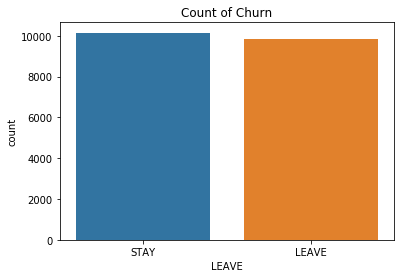

In [6]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='LEAVE', data=data)
plt.title("Count of Churn")
plt.show()

In [7]:
n=len(data)
churn_0=len(data.LEAVE[data.LEAVE == 'STAY'])
churn_1=len(data.LEAVE[data.LEAVE == 'LEAVE'])

print("% of passanger survived in train dataset: ",churn_0*100/n)
print("% of passanger not survived in train dataset: ",churn_1*100/n)

% of passanger survived in train dataset:  50.74
% of passanger not survived in train dataset:  49.26


##### The probability of Customer churn is 49.26%, which means it is not skewed. We don't have to be too sceptical about the model accuracy

In [8]:
cat=['COLLEGE','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
num=['INCOME','OVERAGE','LEFTOVER','HOUSE','HANDSET_PRICE','OVER_15MINS_CALLS_PER_MONTH','AVERAGE_CALL_DURATION']

In [9]:
corr_df=data[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

                               INCOME   OVERAGE  LEFTOVER     HOUSE  \
INCOME                       1.000000  0.000458  0.006515 -0.010964   
OVERAGE                      0.000458  1.000000 -0.003123  0.002412   
LEFTOVER                     0.006515 -0.003123  1.000000  0.006530   
HOUSE                       -0.010964  0.002412  0.006530  1.000000   
HANDSET_PRICE                0.727200  0.000324  0.004004 -0.007756   
OVER_15MINS_CALLS_PER_MONTH  0.002136  0.770557 -0.010411  0.007410   
AVERAGE_CALL_DURATION       -0.007219  0.000653 -0.660285 -0.009359   

                             HANDSET_PRICE  OVER_15MINS_CALLS_PER_MONTH  \
INCOME                            0.727200                     0.002136   
OVERAGE                           0.000324                     0.770557   
LEFTOVER                          0.004004                    -0.010411   
HOUSE                            -0.007756                     0.007410   
HANDSET_PRICE                     1.000000              

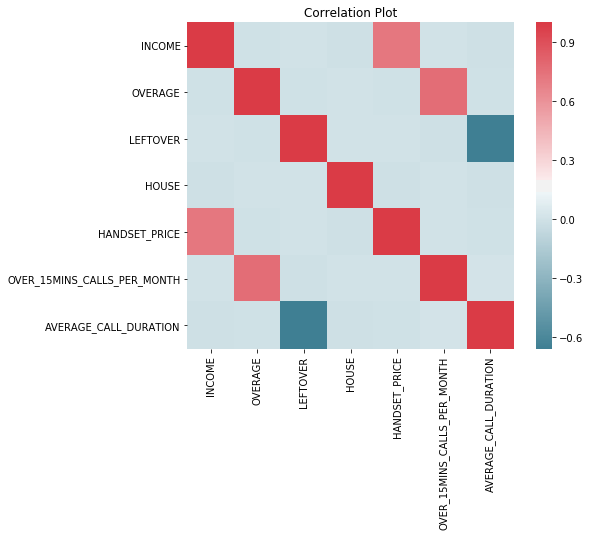

In [10]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

##### There's a strong correlation between INCOME and HANDSET_PRICE, also between OVER_15MINS_CALLS_PER_MONTH and OVERAGE. 
I would like to drop HANDSET_PRICE and OVER_15MINS_CALLS_PER_MONTH to avoid colinearity 

In [11]:
num2=['INCOME','OVERAGE','LEFTOVER','HOUSE','AVERAGE_CALL_DURATION']
corr_df=data[num2]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

                         INCOME   OVERAGE  LEFTOVER     HOUSE  \
INCOME                 1.000000  0.000458  0.006515 -0.010964   
OVERAGE                0.000458  1.000000 -0.003123  0.002412   
LEFTOVER               0.006515 -0.003123  1.000000  0.006530   
HOUSE                 -0.010964  0.002412  0.006530  1.000000   
AVERAGE_CALL_DURATION -0.007219  0.000653 -0.660285 -0.009359   

                       AVERAGE_CALL_DURATION  
INCOME                             -0.007219  
OVERAGE                             0.000653  
LEFTOVER                           -0.660285  
HOUSE                              -0.009359  
AVERAGE_CALL_DURATION               1.000000  


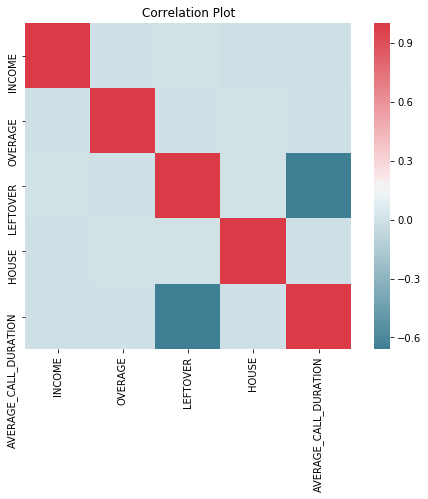

In [12]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

##### There's a mild negative correlation between AVERAGE_CALL_DURATION and LEFTOVER(-0.660285), but let's just select 0.7 as treshold and  keep them both.

##### Let's use chi-square test to understand relationship between categorical variables and target variable¶

In [13]:
from scipy.stats import chi2_contingency
# cat=['COLLEGE','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
csq=chi2_contingency(pd.crosstab(data['LEAVE'], data['COLLEGE']))
print("P-value: ",csq[1])

P-value:  0.03931203735343504


In [14]:
csq2=chi2_contingency(pd.crosstab(data['LEAVE'], data['REPORTED_SATISFACTION']))
print("P-value: ",csq2[1])

P-value:  0.07536174824562034


In [15]:
csq3=chi2_contingency(pd.crosstab(data['LEAVE'], data['REPORTED_USAGE_LEVEL']))
print("P-value: ",csq3[1])

P-value:  0.898292889621597


In [16]:
csq4=chi2_contingency(pd.crosstab(data['LEAVE'], data['CONSIDERING_CHANGE_OF_PLAN']))
print("P-value: ",csq4[1])

P-value:  0.5076614385063292


##### Under the treshold P=0.1, P values for features REPORTED_USAGE_LEVEL and CONSIDERING_CHANGE_OF_PLAN are high. WIth that being said we can not reject our Null Hypothesis which is these features are independent and have no relationship with target variable. So we drop these two features.

##### First Let's check the impact of feature COLLEGE on Churn

Text(0.5, 1.0, 'Impact of COLLEGE on Churn')

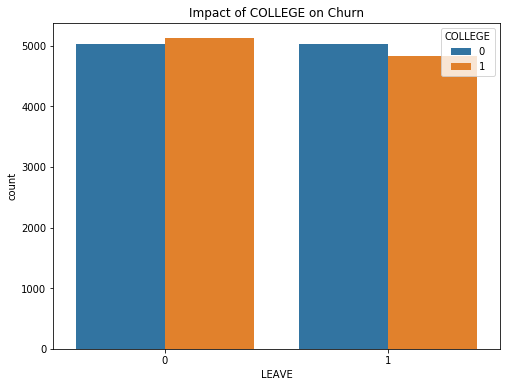

In [36]:
fig, ax=plt.subplots(figsize=(8,6))
ax = sns.countplot(x="LEAVE", data=data,hue='COLLEGE')
plt.title("Impact of COLLEGE on Churn")
# plt.show()

##### There is actually no big difference in churn rate between people who have a college degree or not, although the P-value < 0.05

In [18]:
print(data.isnull().sum())# make sure we have null data

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
LEAVE                          0
dtype: int64


# Data Preparation

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
le = preprocessing.LabelEncoder()

data.COLLEGE=le.fit_transform(data.COLLEGE)

data.REPORTED_SATISFACTION=le.fit_transform(data.REPORTED_SATISFACTION)
data.LEAVE[data.LEAVE == 'STAY'] = 0
data.LEAVE[data.LEAVE == 'LEAVE'] = 1
y = data['LEAVE'].values 
y=y.astype('str')
X=data[['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE',
       'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION']]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Random Forest

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, accuracy_score

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)

In [27]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [29]:
CV_rfc.best_score_

0.7022666666666667

In [32]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, max_depth=7, criterion='entropy')
rfc1.fit(X_test,y_test)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))


Accuracy for Random Forest on CV data:  0.7626


In [33]:
labels=['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE',
       'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION']
import pandas as pd
feature_imp = pd.Series(rfc1.feature_importances_,index=labels).sort_values(ascending=False)
feature_imp

HOUSE                    0.337397
OVERAGE                  0.292696
INCOME                   0.183862
LEFTOVER                 0.092444
AVERAGE_CALL_DURATION    0.058345
REPORTED_SATISFACTION    0.023254
COLLEGE                  0.012002
dtype: float64

No handles with labels found to put in legend.


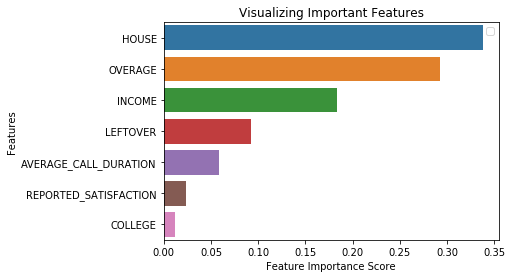

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### To summrize: 

1.I did feature selection and eliminated unrelated features -HANDSET_PRICE, OVER_15MINS_CALLS_PER_MONTH, REPORTED_USAGE_LEVEL and CONSIDERING_CHANGE_OF_PLAN to get rid of data redundancy

2.Trained and tuned a random forest model to classify the customers. This model has a 76.26% predicting accuracy.

3.Overall interpretation: out of the 7 features we selected, HOUSE, OVERAGE and INCOME have the most predictive power, while COLLEGE and REPORTED_SATISFACTION has the least power.




Other thinking:
The model performance is good but not excellent, perhaps because the data is generated and doesn't fit the real industry. For example, in reality, we would assume CONSIDERING_CHANGE_OF_PLAN is a decent indicator for customer churn. However, there is not a strong relationship in our dataset.

# Playground

##### I also built some other classification models just for fun :)
They might not be runnable because I ran them before the finest model but I still want to display them just for reference

# Decision Tree

In [106]:
from sklearn import tree


tree_model.fit(X_train, y_train)


param_grid = {'max_depth':range(1,7)}

# Fitting K-NN to the Training set. Use p=2 for Euclidean distance. 

tree_model = tree.DecisionTreeClassifier()# instantiate KNeighborsClassifier

# Use 5-fold cross validation to select best k
# use 'recall' metric to evaluate your model 

cmodel = GridSearchCV(tree_model,param_grid,cv=5) # instantiate GridSearchCV
cmodel.fit(X_train, y_train)

best_d = cmodel.best_params_  
print('depth = {} is selected using grid search'.format(best_d))

# Fit a KNeighborsClassifier using the best parameters from grid search. Use p=2 for Euclidean distance
tree_model = tree.DecisionTreeClassifier(max_depth=best_d['max_depth']) 
tree_model.fit(X_train, y_train.ravel())

print('Best CV score: ',cmodel.best_score_)

depth = {'max_depth': 4} is selected using grid search
Best CV score:  0.6994666666666667


# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
# Define param_map for different values of k
# Define param_map for different values of k
param_grid = {'n_neighbors':range(20,40,2)}

# Fitting K-NN to the Training set. Use p=2 for Euclidean distance. 
kNN = KNeighborsClassifier(p=2) # instantiate KNeighborsClassifier

# Use 5-fold cross validation to select best k
# use 'recall' metric to evaluate your model 

cmodel = GridSearchCV(kNN,param_grid,cv=5) # instantiate GridSearchCV
cmodel.fit(X_train_std, y_train)

best_k = cmodel.best_params_  # get the best k learned through grid search
print('k = {} is selected using grid search'.format(best_k))

print('Best CV score: ',cmodel.best_score_)

k = {'n_neighbors': 28} is selected using grid search
Best CV score:  0.6651333333333334


#### Comparing the best cross validation score:
    KNN    Decision Tree   Random Forest
    0.665           0.6995          0.702


The random forest model wins over the cross-validation 